Actual column names: ['Row Labels', 'Sum of Percentage of Passive Spawns']

Number of Mobs: 4
Mean Spawn %: 25.00
Median Spawn %: 22.50
Standard Deviation: 16.11


C:\Users\lorda\AppData\Local\Temp\ipykernel_1644\3790645417.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Spawn %', y='Mob Type', palette='viridis')


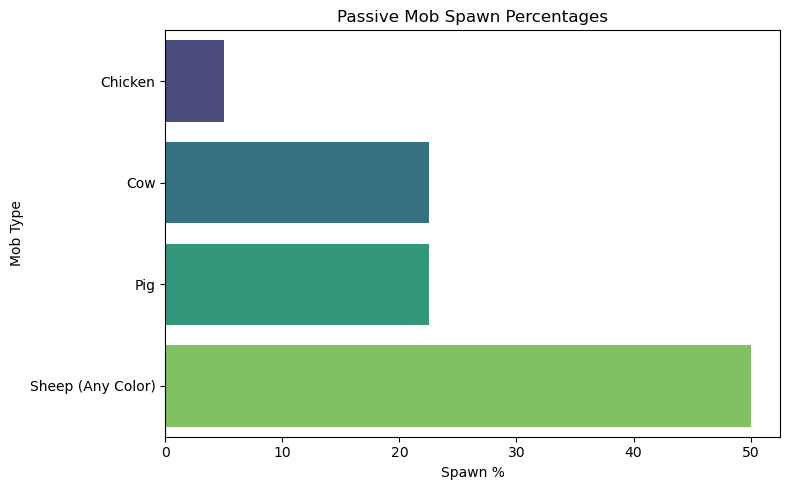

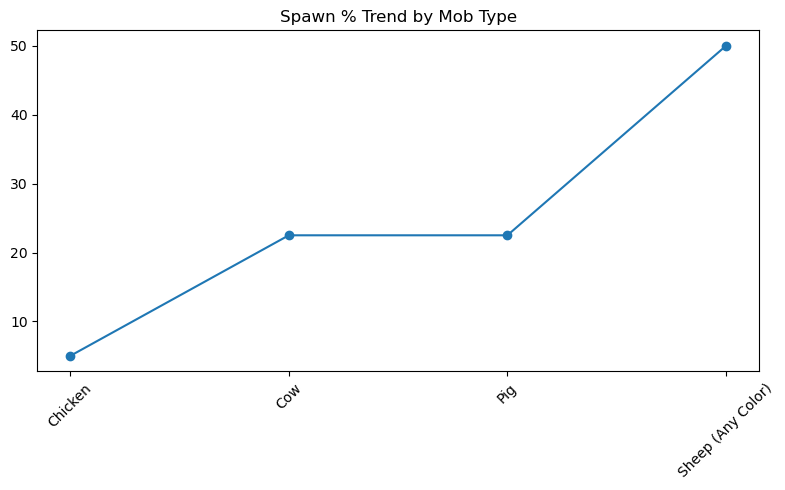

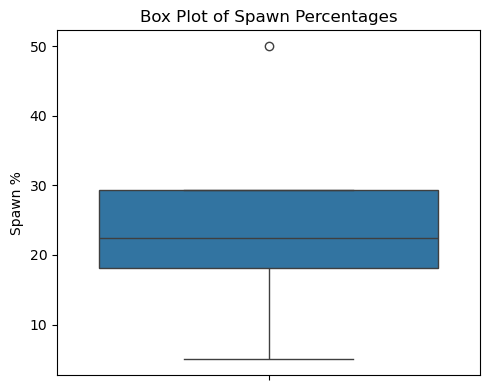

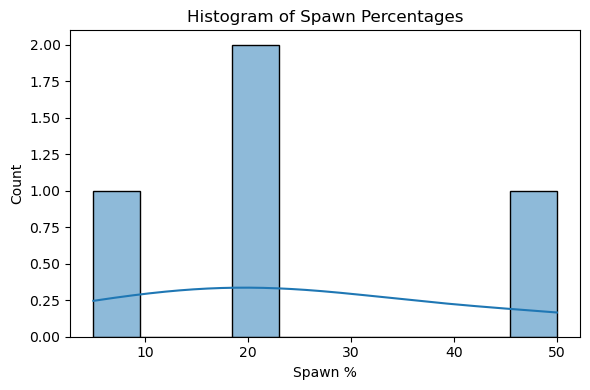

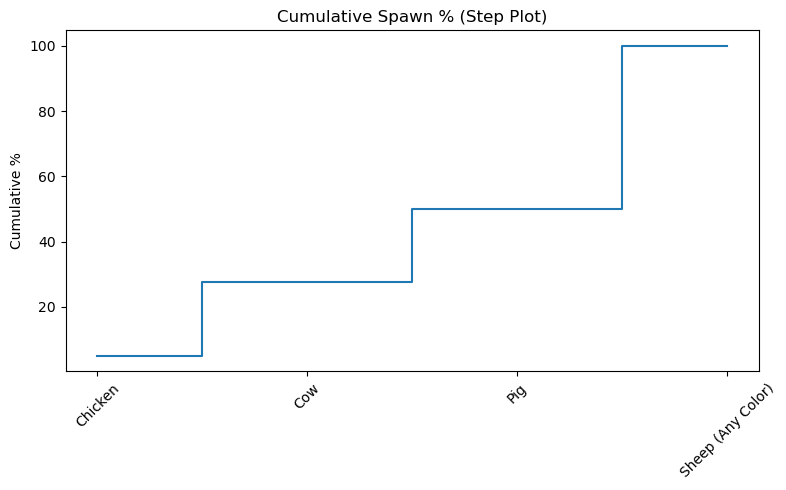

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


file_path = 'C:/Users/lorda/OneDrive/inah/cmo.xlsx'
df = pd.read_excel(file_path, sheet_name=0)  

df.columns = df.columns.str.strip()
print("Actual column names:", df.columns.tolist())  

# Rename based on actual names
df = df.rename(columns={
    'Row Labels': 'Mob Type',
    'Sum of Percentage of Passive Spawns': 'Spawn %'
})

# Confirm the columns were renamed
if 'Spawn %' not in df.columns or 'Mob Type' not in df.columns:
    raise ValueError("Column renaming failed. Check column headers in Excel.")

# Remove 'Grand Total' if present
df = df[df['Mob Type'].str.lower() != 'grand total']

# Convert to numeric
df['Spawn %'] = pd.to_numeric(df['Spawn %'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['Spawn %'])

# Summary stats
print(f"\nNumber of Mobs: {len(df)}")
print(f"Mean Spawn %: {np.mean(df['Spawn %']):.2f}")
print(f"Median Spawn %: {np.median(df['Spawn %']):.2f}")
print(f"Standard Deviation: {np.std(df['Spawn %']):.2f}")

# Standardize
scaler = StandardScaler()
df['Spawn % (Scaled)'] = scaler.fit_transform(df[['Spawn %']])

# Log transform
df['Log(Spawn % + 1)'] = np.log1p(df['Spawn %'])

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Spawn %', y='Mob Type', palette='viridis')
plt.title("Passive Mob Spawn Percentages")
plt.tight_layout()
plt.show()

# Line Chart
plt.figure(figsize=(8, 5))
plt.plot(df['Mob Type'], df['Spawn %'], marker='o')
plt.xticks(rotation=45)
plt.title("Spawn % Trend by Mob Type")
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(5, 4))
sns.boxplot(y=df['Spawn %'])
plt.title("Box Plot of Spawn Percentages")
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(6, 4))
sns.histplot(df['Spawn %'], bins=10, kde=True)
plt.title("Histogram of Spawn Percentages")
plt.xlabel("Spawn %")
plt.tight_layout()
plt.show()

# Cumulative Step Plot
plt.figure(figsize=(8, 5))
plt.step(df['Mob Type'], df['Spawn %'].cumsum(), where='mid')
plt.xticks(rotation=45)
plt.title("Cumulative Spawn % (Step Plot)")
plt.ylabel("Cumulative %")
plt.tight_layout()
plt.show()
